In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from PSFDataset import MultiPSFDataset
from ClassifierModel import ClassifierModel

# Normalized vs Not

In [2]:
trainset = MultiPSFDataset.load('Pytorch Datasets/Normalization/Raw/raw_training.pt')
testset = MultiPSFDataset.load('Pytorch Datasets/Normalization/Raw/raw_testing.pt')
norm_trainset = MultiPSFDataset.load('Pytorch Datasets/Normalization/Normalized/norm_training.pt')
norm_testset = MultiPSFDataset.load('Pytorch Datasets/Normalization/Normalized/norm_testing.pt')

In [3]:
print(len(trainset), len(testset), len(norm_trainset), len(norm_testset))

49692 2291 49692 2291


In [4]:
# training data
N_training_examples = 10000 # 100 examples per class
N_validation_examples = 2000 # 100 examples per class
random_seed = 1 # random seed for reproducibility
np.random.seed(random_seed)
all_train_indices = np.random.choice(np.arange(len(trainset)),
                               size=N_training_examples+N_validation_examples)
training_indices = all_train_indices[:N_training_examples]
validation_indices = all_train_indices[N_training_examples:]

In [5]:
# configuration parameters, you can play around with these
pooling = 'max' # 'max' or 'mean'

if pooling == 'max':
    pool_fcn = nn.AdaptiveMaxPool2d((1, 1))
else:
    pool_fcn = nn.AdaptiveAvgPool2d((1, 1))

# your model will have length(channel_widths)-1 layers
channel_widths = [1, 64, 128, 256, 512] # must start with a 1 and be at least length--2
linear_sizes = [512, 128]
kernel = 3
model_15_raw = ClassifierModel(channel_widths, linear_sizes, kernel, pool_fcn)

In [6]:
config = {'lr': 1e-4,
          'n_epochs': 20,
          'batch_size': 128}
verbose = True # print metrics during training, False for no printing
model_15_raw.train_model(trainset, training_indices, validation_indices, config)

Epoch 1/20: (Train) Loss = 1.5109e+00, Acc = 0.5468, (Val) Loss = 5.8425e-01, Acc = 0.7565
Epoch 2/20: (Train) Loss = 6.4770e-01, Acc = 0.6550, (Val) Loss = 6.1826e-01, Acc = 0.5925
Epoch 3/20: (Train) Loss = 5.9085e-01, Acc = 0.7014, (Val) Loss = 7.6151e-01, Acc = 0.5925
Epoch 4/20: (Train) Loss = 5.4712e-01, Acc = 0.7293, (Val) Loss = 6.4786e-01, Acc = 0.5445
Epoch 5/20: (Train) Loss = 5.5038e-01, Acc = 0.7235, (Val) Loss = 5.0032e-01, Acc = 0.7300
Epoch 6/20: (Train) Loss = 5.4859e-01, Acc = 0.7238, (Val) Loss = 8.2801e-01, Acc = 0.6410
Epoch 7/20: (Train) Loss = 5.0947e-01, Acc = 0.7594, (Val) Loss = 5.9464e-01, Acc = 0.6140
Epoch 8/20: (Train) Loss = 4.8250e-01, Acc = 0.7822, (Val) Loss = 1.0833e+00, Acc = 0.5640
Epoch 9/20: (Train) Loss = 5.0926e-01, Acc = 0.7543, (Val) Loss = 6.5347e-01, Acc = 0.7325
Epoch 10/20: (Train) Loss = 4.8548e-01, Acc = 0.7740, (Val) Loss = 4.9928e-01, Acc = 0.7805
Epoch 11/20: (Train) Loss = 4.9727e-01, Acc = 0.7647, (Val) Loss = 4.5755e-01, Acc = 0.80

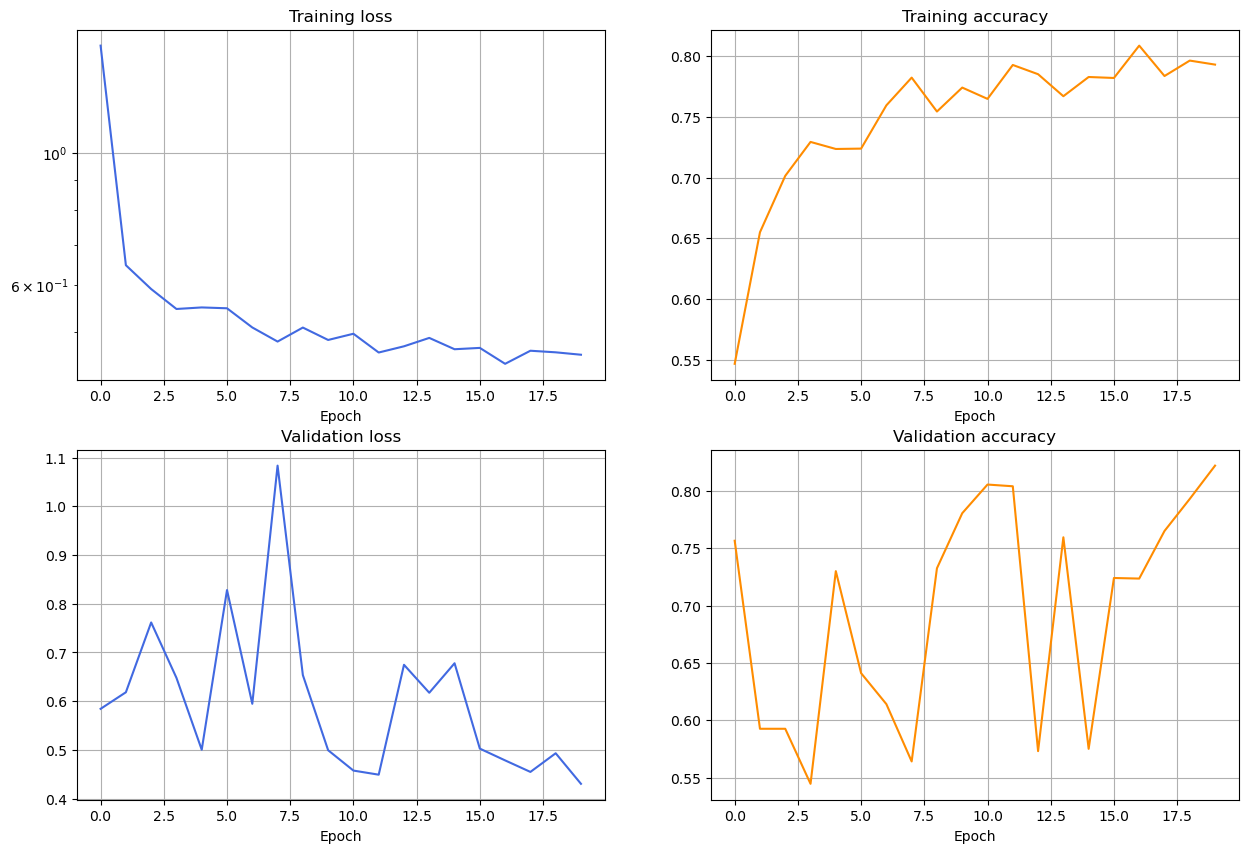

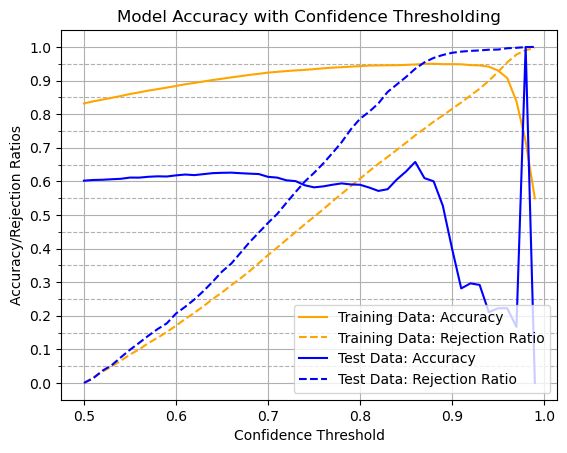

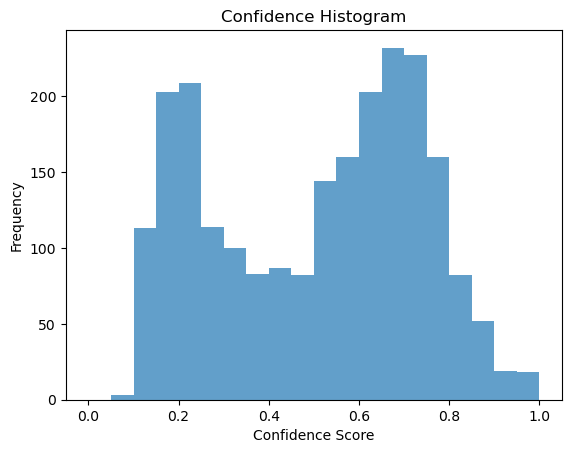

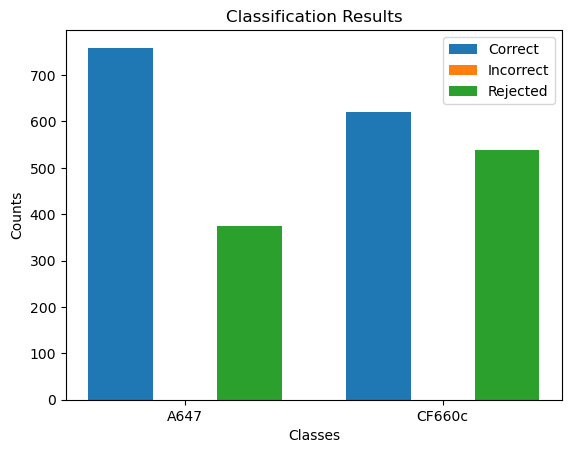

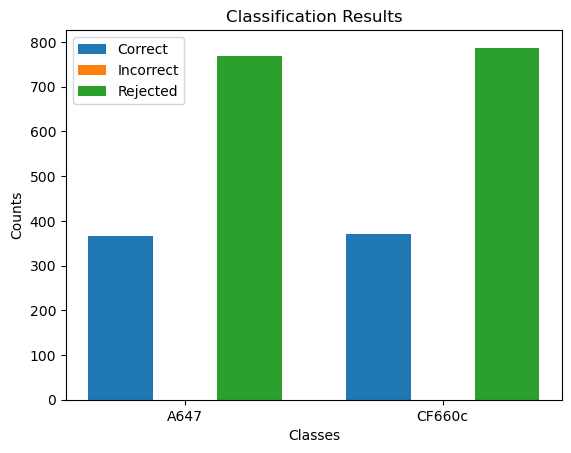

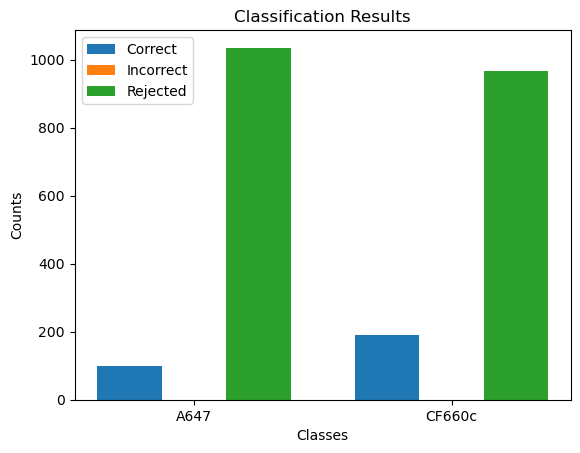

In [7]:
# plot training/validation loss and accuracy over training time
model = model_15_raw
train_data = trainset
test_data = testset
model.plot_model_results()
model.plot_confidence_thresholding([['Training Data', train_data], ['Test Data', test_data]], thresholds=np.arange(0.5, 1, 0.01))
model.confidence_histogram(test_data)
model.plot_classification_results(test_data)
model.plot_classification_results(test_data, confidence_threshold=0.7)
model.plot_classification_results(test_data, confidence_threshold=0.8)


In [10]:
print(torch.__version__)

2.0.1


# 19px

In [3]:
training_data = MultiPSFDataset.load('Pytorch Datasets/Cover Slip (A647 CF660c)/A647_vs_CF660c_all.pt')
real_data = MultiPSFDataset.load('Pytorch Datasets/Real Data (A647 CF660c)/A647_vs_CF660c_most_normal_single_movie.pt')

In [4]:
# you can try playing around with more or less training data
N_training_examples = 10000 # 100 examples per class
N_validation_examples = 2000 # 100 examples per class
random_seed = 2 # random seed for reproducibility
np.random.seed(random_seed)
all_train_indices = np.random.choice(np.arange(len(training_data)),
                               size=2*N_training_examples+N_validation_examples)
# Make two unique training/validation sets for change partway through training if desired
all_train_indices_1 = all_train_indices[:int(len(all_train_indices)/2)]
all_train_indices_2 = all_train_indices[int(len(all_train_indices)/2):]
training_indices_1 = all_train_indices_1[:N_training_examples]
validation_indices_1 = all_train_indices_1[N_training_examples:]
training_indices_2 = all_train_indices_2[:N_training_examples]
validation_indices_2 = all_train_indices_2[N_training_examples:]

In [5]:
# configuration parameters, you can play around with these
pooling = 'max' # 'max' or 'mean'

if pooling == 'max':
    pool_fcn = nn.AdaptiveMaxPool2d((1, 1))
else:
    pool_fcn = nn.AdaptiveAvgPool2d((1, 1))

# your model will have length(channel_widths)-1 layers
channel_widths = [1, 16, 64, 128, 512] # must start with a 1 and be at least length--2
linear_sizes = [512, 128]
kernel = 3
model_14_19px = ClassifierModel(channel_widths, linear_sizes, kernel, pool_fcn)

In [7]:
config = {'lr': 1e-5,
          'n_epochs': 100,
          'batch_size': 128}
verbose = True # print metrics during training, False for no printing
model_14_19px.train_model(training_data, training_indices_1, validation_indices_1, config)

Epoch 5/100: (Train) Loss = 5.3984e-01, Acc = 0.7632, (Val) Loss = 6.4578e-01, Acc = 0.7460
Epoch 10/100: (Train) Loss = 5.0462e-01, Acc = 0.7799, (Val) Loss = 7.6795e-01, Acc = 0.4720
Epoch 15/100: (Train) Loss = 4.8792e-01, Acc = 0.7942, (Val) Loss = 5.7308e-01, Acc = 0.6870
Epoch 20/100: (Train) Loss = 4.7529e-01, Acc = 0.7984, (Val) Loss = 6.6041e-01, Acc = 0.7400
Epoch 25/100: (Train) Loss = 4.6326e-01, Acc = 0.8084, (Val) Loss = 5.3104e-01, Acc = 0.7450
Epoch 30/100: (Train) Loss = 4.5641e-01, Acc = 0.8119, (Val) Loss = 6.7324e-01, Acc = 0.5250
Epoch 35/100: (Train) Loss = 4.5256e-01, Acc = 0.8093, (Val) Loss = 5.2936e-01, Acc = 0.7740
Epoch 40/100: (Train) Loss = 4.4610e-01, Acc = 0.8124, (Val) Loss = 5.0416e-01, Acc = 0.7780
Epoch 45/100: (Train) Loss = 4.4080e-01, Acc = 0.8207, (Val) Loss = 6.1838e-01, Acc = 0.5780
Epoch 50/100: (Train) Loss = 4.3458e-01, Acc = 0.8246, (Val) Loss = 4.9752e-01, Acc = 0.7970
Epoch 55/100: (Train) Loss = 4.2830e-01, Acc = 0.8278, (Val) Loss = 5.1

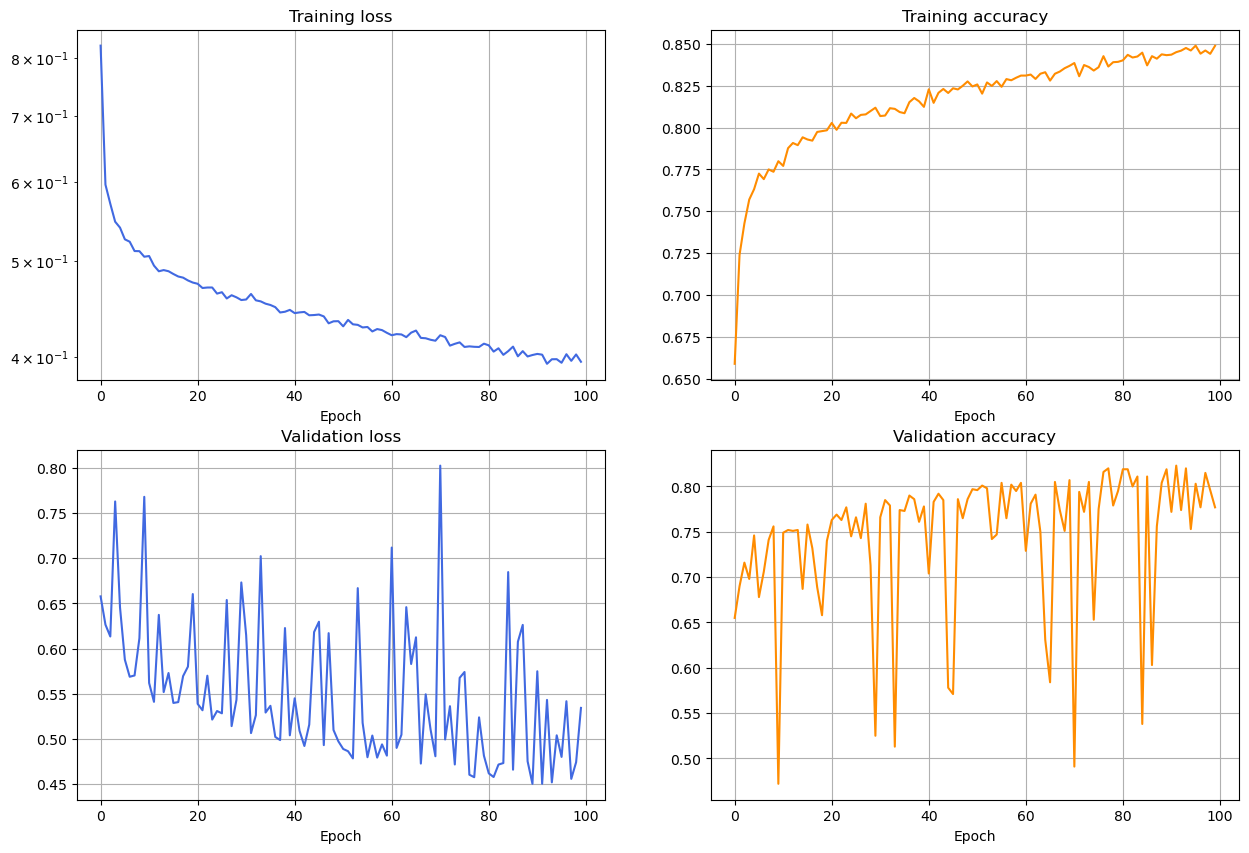

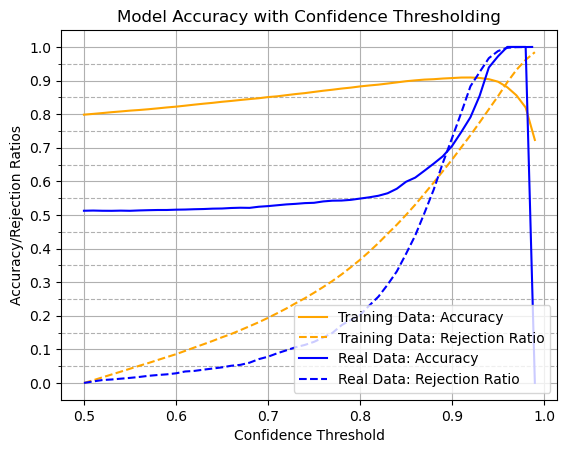

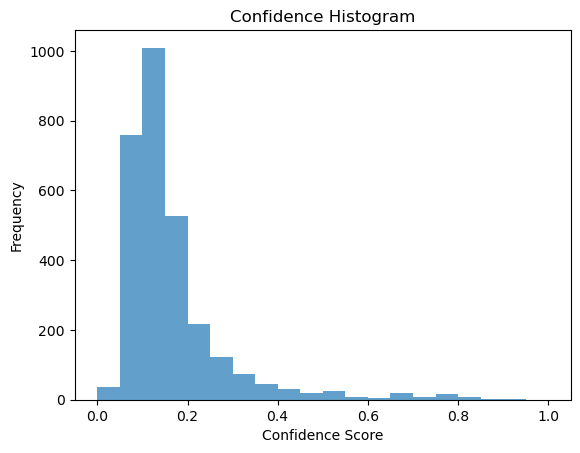

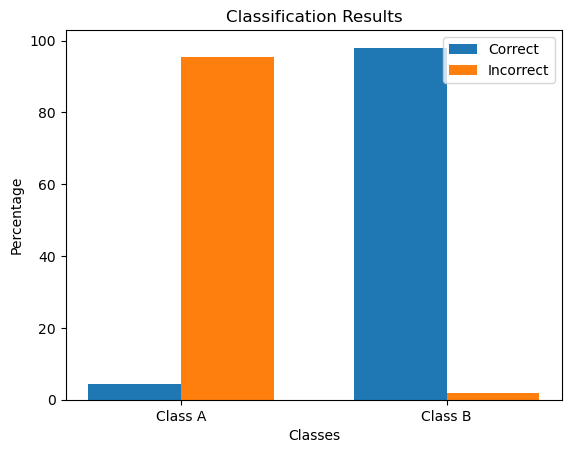

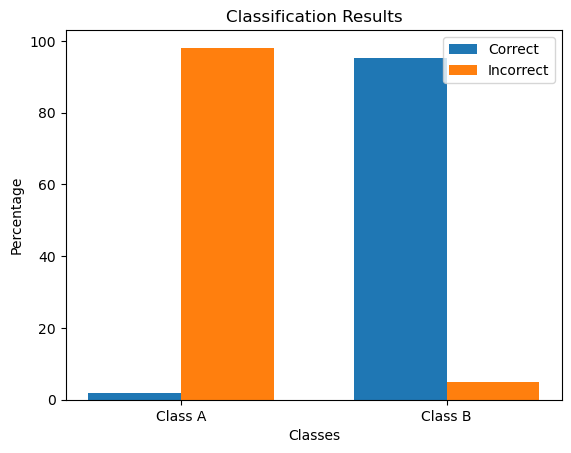

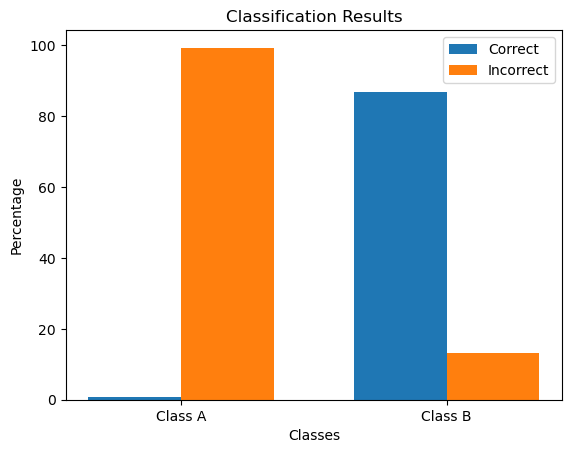

In [8]:
# plot training/validation loss and accuracy over training time
model_14_19px.plot_model_results()
model_14_19px.plot_confidence_thresholding([['Training Data', training_data], ['Real Data', real_data]], thresholds=np.arange(0.5, 1, 0.01))
model_14_19px.confidence_histogram(real_data)
model_14_19px.plot_classification_results(real_data)
model_14_19px.plot_classification_results(real_data, confidence_threshold=0.7)
model_14_19px.plot_classification_results(real_data, confidence_threshold=0.8)


# 13px

In [2]:
training_data = MultiPSFDataset.load('Pytorch Datasets/Cover Slip (A647 CF660c)/A647_vs_CF660c_all_13px.pt')
real_data = MultiPSFDataset.load('Pytorch Datasets/Real Data (A647 CF660c)/A647_vs_CF660c_most_normal_single_movie_13px.pt')

In [3]:
# training data
N_training_examples = 10000 # 100 examples per class
N_validation_examples = 2000 # 100 examples per class
random_seed = 1 # random seed for reproducibility
np.random.seed(random_seed)
all_train_indices = np.random.choice(np.arange(len(training_data)),
                               size=N_training_examples+N_validation_examples)
training_indices = all_train_indices[:N_training_examples]
validation_indices = all_train_indices[N_training_examples:]

# real data
N_training_examples = 500 # 100 examples per class
N_validation_examples = 100 # 100 examples per class
random_seed = 1 # random seed for reproducibility
np.random.seed(random_seed)
all_train_indices = np.random.choice(np.arange(len(real_data)),
                               size=N_training_examples+N_validation_examples)
real_training_indices = all_train_indices[:N_training_examples]
real_validation_indices = all_train_indices[N_training_examples:N_training_examples+N_validation_examples]
real_test_indices = all_train_indices[N_training_examples+N_validation_examples:]


In [4]:
# configuration parameters, you can play around with these
pooling = 'max' # 'max' or 'mean'

if pooling == 'max':
    pool_fcn = nn.AdaptiveMaxPool2d((1, 1))
else:
    pool_fcn = nn.AdaptiveAvgPool2d((1, 1))

# your model will have length(channel_widths)-1 layers
channel_widths = [1, 64, 128, 256, 512] # must start with a 1 and be at least length--2
linear_sizes = [512, 128]
kernel = 3
model_14_13px = ClassifierModel(channel_widths, linear_sizes, kernel, pool_fcn)

In [5]:
config = {'lr': 1e-4,
          'n_epochs': 100,
          'batch_size': 128}
verbose = True # print metrics during training, False for no printing
model_14_13px.train_model(training_data, training_indices, validation_indices, config)
model_14_13px.train_model(real_data, real_training_indices, real_validation_indices, config)

Epoch 5/100: (Train) Loss = 5.4880e-01, Acc = 0.7223, (Val) Loss = 5.0700e-01, Acc = 0.8005
Epoch 10/100: (Train) Loss = 5.2079e-01, Acc = 0.7451, (Val) Loss = 6.4834e-01, Acc = 0.5530
Epoch 15/100: (Train) Loss = 4.9440e-01, Acc = 0.7709, (Val) Loss = 1.0929e+00, Acc = 0.5310
Epoch 20/100: (Train) Loss = 4.5904e-01, Acc = 0.7940, (Val) Loss = 4.3725e-01, Acc = 0.8200
Epoch 25/100: (Train) Loss = 4.7212e-01, Acc = 0.7792, (Val) Loss = 4.5709e-01, Acc = 0.8110
Epoch 30/100: (Train) Loss = 4.4001e-01, Acc = 0.7998, (Val) Loss = 4.4444e-01, Acc = 0.8180
Epoch 35/100: (Train) Loss = 4.4470e-01, Acc = 0.8015, (Val) Loss = 4.5044e-01, Acc = 0.7700
Epoch 40/100: (Train) Loss = 4.3222e-01, Acc = 0.8150, (Val) Loss = 4.0506e-01, Acc = 0.8255
Epoch 45/100: (Train) Loss = 4.2344e-01, Acc = 0.8171, (Val) Loss = 5.4072e-01, Acc = 0.6690
Epoch 50/100: (Train) Loss = 4.2360e-01, Acc = 0.8125, (Val) Loss = 4.9451e-01, Acc = 0.7925
Epoch 55/100: (Train) Loss = 4.1056e-01, Acc = 0.8201, (Val) Loss = 3.9

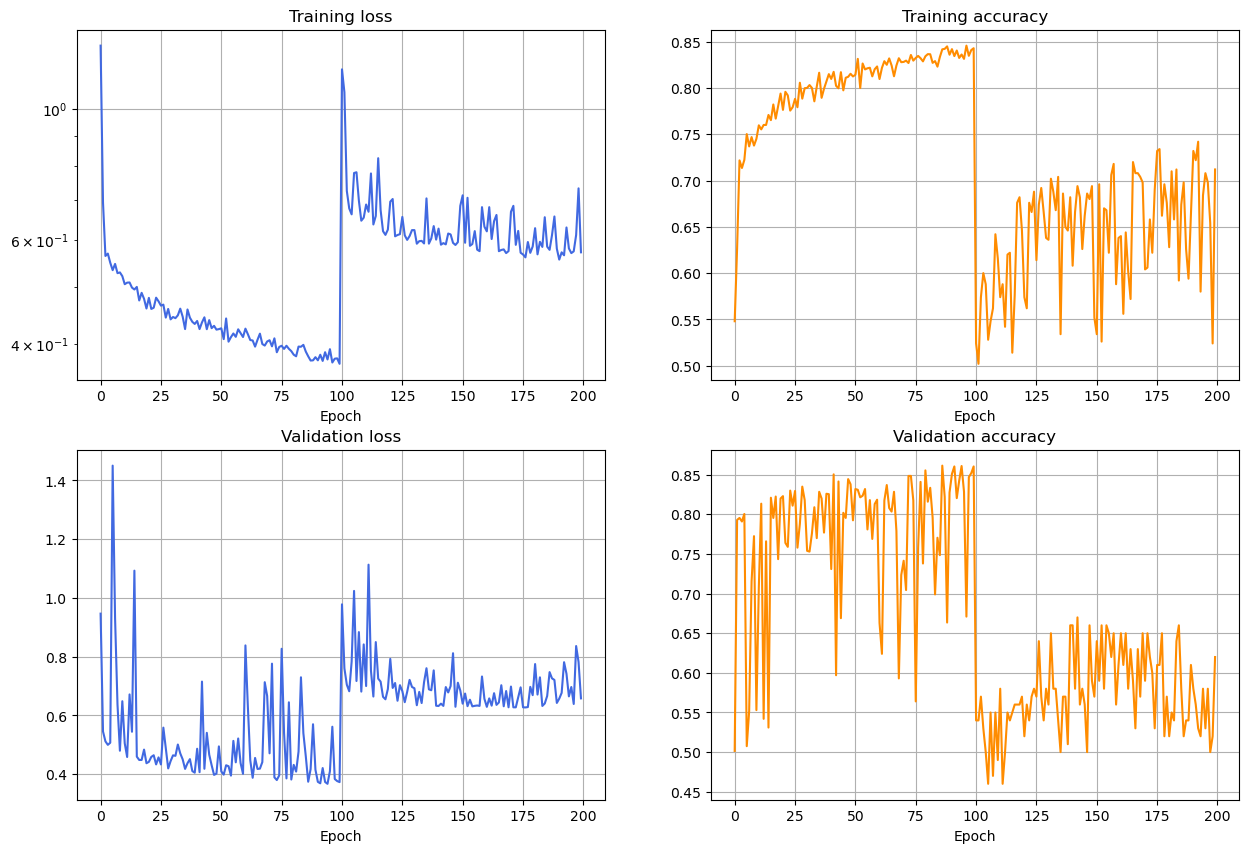

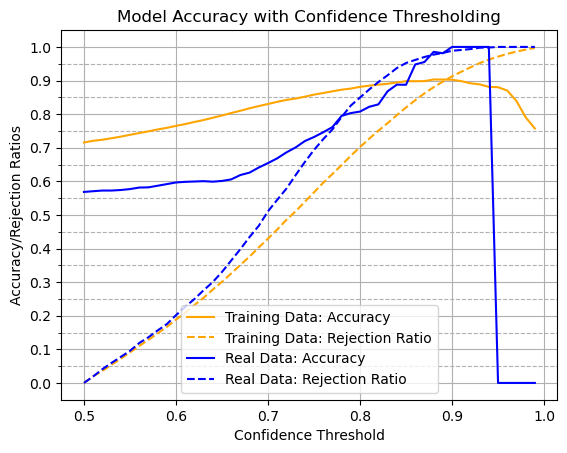

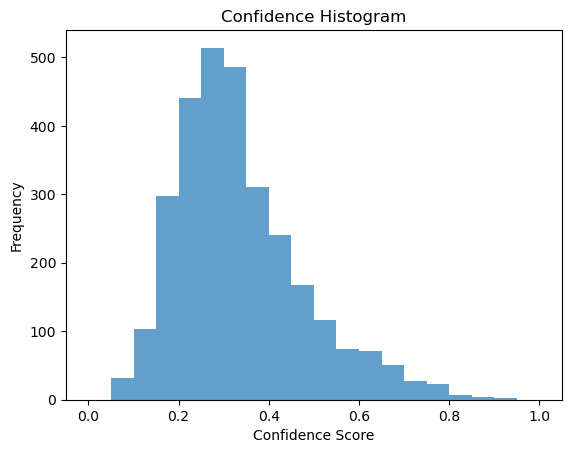

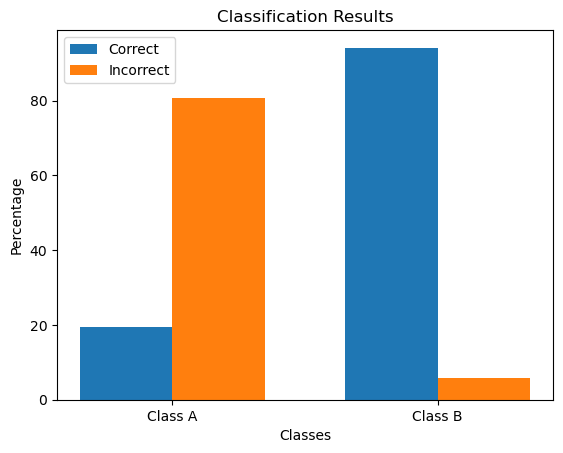

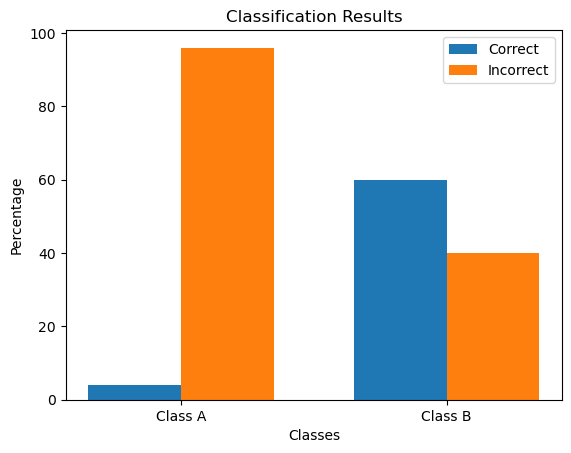

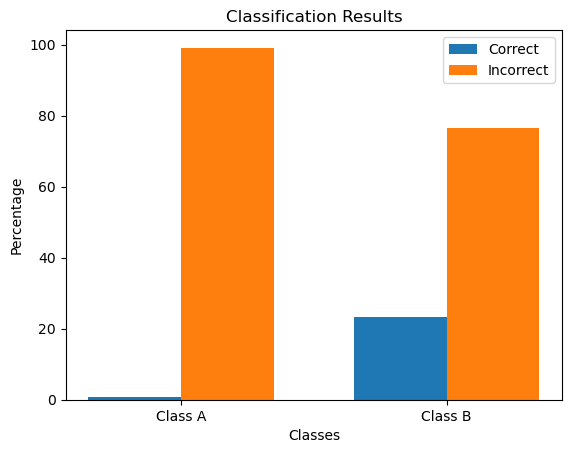

In [6]:
# plot training/validation loss and accuracy over training time
model_14_13px.plot_model_results()
model_14_13px.plot_confidence_thresholding([['Training Data', training_data], ['Real Data', real_data]], thresholds=np.arange(0.5, 1, 0.01))
model_14_13px.confidence_histogram(real_data)
model_14_13px.plot_classification_results(real_data)
model_14_13px.plot_classification_results(real_data, confidence_threshold=0.7)
model_14_13px.plot_classification_results(real_data, confidence_threshold=0.8)
